### Imports

In [37]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
from torchview import draw_graph
import pandas as pd

### Load CSV

In [38]:
data_df = pd.read_csv('Fish.csv')
data_df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [39]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [40]:
data_df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [41]:
data_df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [42]:
data_df.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [43]:
data_df.tail(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
149,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772
150,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852
151,Smelt,10.0,11.3,11.8,13.1,2.2139,1.2838
152,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659
153,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [44]:
data_df['Weight'] = data_df['Weight'].fillna(data_df['Weight'].mean())

In [45]:
data_df.duplicated().sum()

np.int64(0)

In [46]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [47]:
data_df['Species'].dtype

dtype('O')

### Imports For Data loader and Preprocessing

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
encoder = LabelEncoder()
data_df['Encoded_Species'] = encoder.fit_transform(data_df['Species'])

In [50]:
data_df[['Species','Encoded_Species']]

,Species,Encoded_Species
0,Bream,0
1,Bream,0
2,Bream,0
3,Bream,0
4,Bream,0
...,...,...
154,Smelt,5
155,Smelt,5
156,Smelt,5
157,Smelt,5


In [51]:
data_df['Encoded_Species'].unique()

array([0, 4, 6, 1, 2, 3, 5])

In [52]:
data_df['Encoded_Species'].nunique()

7

In [53]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Species          159 non-null    object 
 1   Weight           159 non-null    float64
 2   Length1          159 non-null    float64
 3   Length2          159 non-null    float64
 4   Length3          159 non-null    float64
 5   Height           159 non-null    float64
 6   Width            159 non-null    float64
 7   Encoded_Species  159 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


In [54]:
x = data_df[['Weight','Length1','Length2','Length3','Height','Width']]
x.head(3)
y = data_df['Encoded_Species']
y.head(3)

0    0
1    0
2    0
Name: Encoded_Species, dtype: int64

In [55]:
print(x.shape)
print(y.shape)

(159, 6)
(159,)


### Imports for Splitting (splitting Data Into X and Y)

In [56]:
from sklearn.model_selection import train_test_split

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [78]:
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(32, 6)
(127, 6)
(127,)
(32,)


 ### Standard Scaler X = ANN learns faster and better when input features are scaled so all values are in a similar range.

 
scaled= x -mean /std

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(x_train_scaled.shape)
print(x_test_scaled.shape)


(127, 6)
(32, 6)


### Model building in ANN


In [81]:
import torch


In [82]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print("Device:", device)

### Convert values into Tensors

In [83]:
device = torch.device('cpu')
print(device)

x_train_tensor = torch.tensor(x_train_scaled, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test_scaled, dtype=torch.float32)

print(x_train_tensor.shape,x_train_tensor.dtype)
print(x_test_tensor.shape,x_test_tensor.dtype)


y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values,dtype=torch.long)

print(y_train_tensor.shape, y_train_tensor.dtype)
print(y_test_tensor.shape, y_test_tensor.dtype)


cpu
torch.Size([127, 6]) torch.float32
torch.Size([32, 6]) torch.float32
torch.Size([127]) torch.int64
torch.Size([32]) torch.int64


### Creating ANN Model For Fish Classification

In [84]:
import torch.nn as nn


In [85]:
class FishANN(nn.Module):
    def __init__(self,input_size,output_size,neurons):
        super().__init__()
        self.input_layer1 = nn.Linear(input_size,neurons)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(neurons,output_size)

    def forward(self,x):
        out = self.input_layer1(x)
        out = self.relu(out) 
        out = self.output_layer(out)

        return out


input_size =6 
neurons = 12
output_size = data_df['Encoded_Species'].nunique()

Model = FishANN(input_size,output_size,neurons)
print(Model)

FishANN(
  (input_layer1): Linear(in_features=6, out_features=12, bias=True)
  (relu): ReLU()
  (output_layer): Linear(in_features=12, out_features=7, bias=True)
)


### Datasets and Dataloader are used to create Mini batch

In [86]:
from torch.utils.data import TensorDataset,DataLoader

In [87]:
# train_dataset = TensorDataset(x_train_tensor,y_train_tensor)
# test_dataset = TensorDataset(x_test_tensor,y_test_tensor)

# batch_size = 16

# train_dataloader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
# test_dataloader = DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

### Graph Wiz


(process:18804): Pango-WARNING **: 19:17:16.344: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


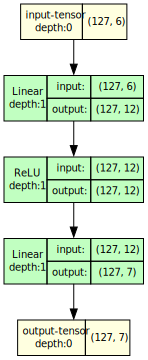

In [88]:
from torchview import draw_graph
draw_graph(Model,input_size=(127,6)).visual_graph

In [89]:
loss_counter  = nn.CrossEntropyLoss()

In [106]:
optimizer_fish = torch.optim.SGD(Model.parameters(),lr=0.001)

In [107]:
loss_values = []

test_losses = []
for epochs in range(200):
    optimizer_fish.zero_grad()

    output_fish = Model(x_train_tensor)

    loss = loss_counter(output_fish,y_train_tensor)

    loss.backward()

    optimizer_fish.step()

    loss_values.append(loss.item())


    Model.eval()
    with torch.no_grad():
        test_output = Model(x_test_tensor)
        test_loss = loss_counter(test_output,y_test_tensor)
        test_losses.append(test_loss.item())
    
    if epochs % 10 == 0:
        print(f'Train loss : {loss_values[-1]:.4f},Test Loss : {test_losses[-1]:.4f}')

Train loss : 1.7969,Test Loss : 1.7891
Train loss : 1.7940,Test Loss : 1.7862
Train loss : 1.7911,Test Loss : 1.7832
Train loss : 1.7883,Test Loss : 1.7802
Train loss : 1.7854,Test Loss : 1.7773
Train loss : 1.7826,Test Loss : 1.7743
Train loss : 1.7798,Test Loss : 1.7714
Train loss : 1.7770,Test Loss : 1.7685
Train loss : 1.7742,Test Loss : 1.7656
Train loss : 1.7715,Test Loss : 1.7628
Train loss : 1.7687,Test Loss : 1.7599
Train loss : 1.7660,Test Loss : 1.7571
Train loss : 1.7633,Test Loss : 1.7543
Train loss : 1.7606,Test Loss : 1.7515
Train loss : 1.7579,Test Loss : 1.7487
Train loss : 1.7552,Test Loss : 1.7459
Train loss : 1.7526,Test Loss : 1.7432
Train loss : 1.7499,Test Loss : 1.7404
Train loss : 1.7473,Test Loss : 1.7377
Train loss : 1.7447,Test Loss : 1.7350


### Plotting train loss

In [108]:
import matplotlib.pyplot as plt

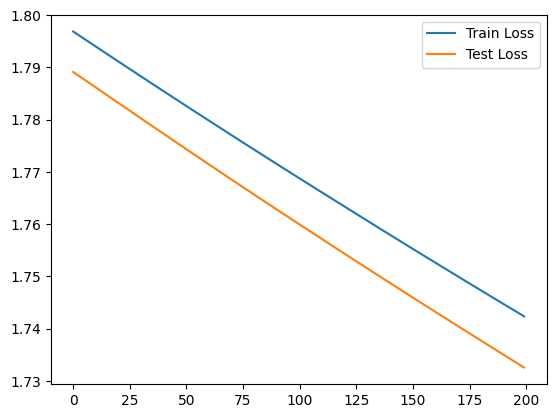

In [110]:
plt.plot(loss_values,label='Train Loss')
plt.plot(test_losses,label='Test Loss')
plt.legend()
plt.show()

C:\Users\OMKAR\.conda\envs\DeepLearning_Models\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\OMKAR\.conda\envs\DeepLearning_Models\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\OMKAR\.conda\envs\DeepLearning_Models\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.00      0.00      0.00         9
           2       0.42      0.96      0.58        45
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         5

    accuracy                           0.50       127
   macro avg       0.18      0.24      0.19       127
weighted avg       0.33      0.50      0.38       127



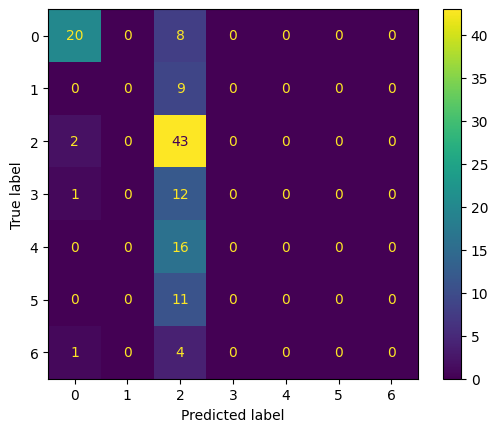

In [115]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
Model.eval()
with torch.no_grad():
    output = Model(x_train_tensor)
    _, predictions = torch.max(output,1)
    print(classification_report(y_train_tensor,predictions))
    cm = confusion_matrix(y_train_tensor,predictions)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()